In [5]:
import numpy as np
import scipy
import os
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys
import pandas as pd
from typing import OrderedDict

In [82]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-6)):
    """Computation of the signal power in dB

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        Fs (scalar): Sampling rate
        win_len_sec (float): Length (seconds) of the window (Default value = 0.1)
        power_ref (float): Reference power level (0 dB) (Default value = 10**(-12))

    Returns:
        power_db (np.ndarray): Signal power in dB
    """
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

Fs = 22050
x, Fs = librosa.load('data/lofi.wav', sr=Fs, mono=True)
win_len_sec = 0.2

In [83]:
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)

C:\Users\bensa\AppData\Local\Temp\ipykernel_51708\4174611519.py:17: RuntimeWarning: divide by zero encountered in log10
  power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)


In [84]:
power_db = np.nan_to_num(power_db, 0)

In [85]:
max_index = 100*Fs

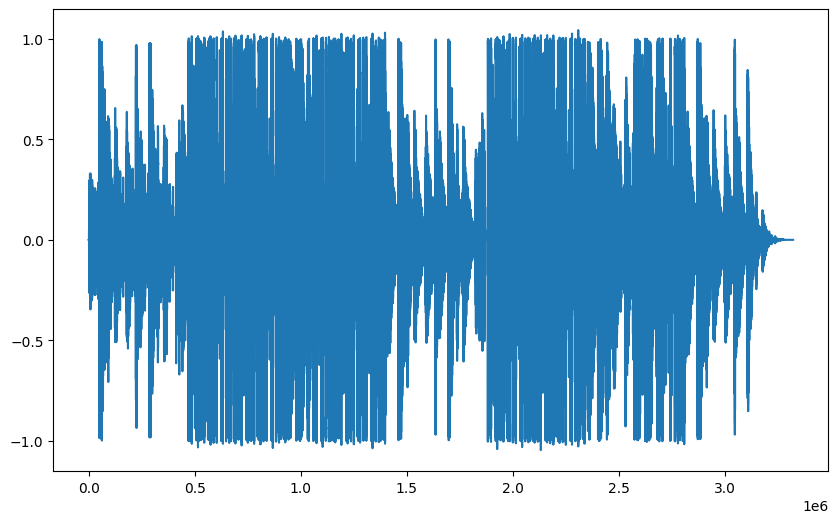

In [86]:
plt.figure(figsize=(10,6))
# librosa.display.waveshow(x[:3 * Fs], sr=Fs, color='blue', x_axis='frames')
plt.plot(x)
plt.show()

In [87]:
power_db2 = np.abs(power_db)
# power_db2 = np.c  lip(power_db2, power_db2.mean()-power_db2.std(), power_db2.mean()+power_db2.std())
# np.clip(power_db2, power_db2.mean()-power_db2.std(), power_db2.mean()+power_db2.std())
# loudness = (power_db2 - power_db2.min()) / (power_db2.max() - power_db2.min())
power_db2

array([1.64499073e+001, 1.65769941e+001, 1.67120370e+001, ...,
       1.79769313e+308, 1.79769313e+308, 1.79769313e+308])

c:\Users\bensa\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\matplotlib\axes\_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


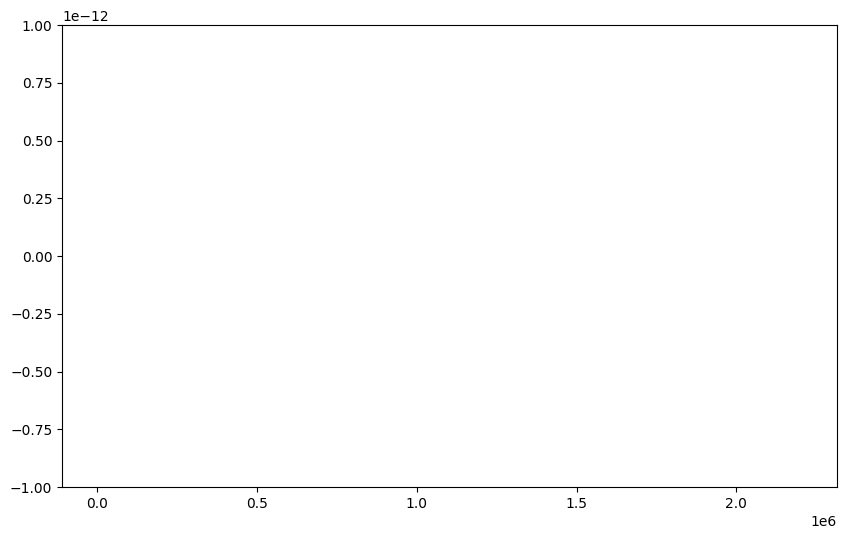

In [78]:
plt.figure(figsize=(10,6))
plt.plot(power_db2[:max_index])
plt.show()

In [35]:
def generate_audio_tag_html_list(list_x, Fs, width='150', height='40'):
    """Generates audio tag for html needed to be shown in table

    Notebook: C8/C8S1_HPS.ipynb

    Args:
        list_x (list): List of waveforms
        Fs (scalar): Sample rate
        width (str): Width in px (Default value = '150')
        height (str): Height in px (Default value = '40')

    Returns:
        audio_tag_html_list (list): List of HTML strings with audio tags
    """
    audio_tag_html_list = []
    for i in range(len(list_x)):
        audio_tag = ipd.Audio(list_x[i], rate=Fs)
        audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
        audio_tag_html = audio_tag_html.replace('<audio ',
                                                '<audio style="width: '+width+'px; height: '+height+'px;"')
        audio_tag_html_list.append(audio_tag_html)
    return audio_tag_html_list

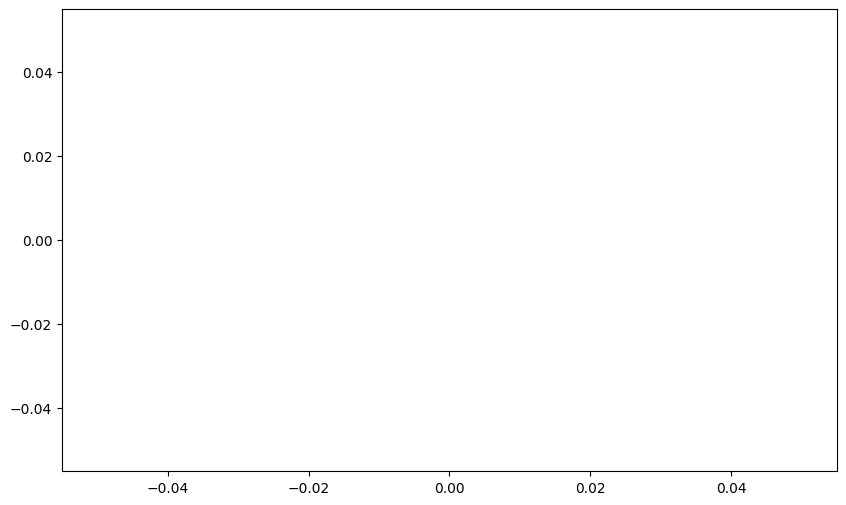

In [36]:
plt.figure(figsize=(10,6))
plt.plot(loudness[:max_index])
plt.show()

In [37]:
html_x = generate_audio_tag_html_list([x], Fs=Fs)
df = pd.DataFrame(OrderedDict([
    ('Piece', ['Beethoven']),  
    ('x', html_x),
]))
df.index = np.arange(1, len(df) + 1)
ipd.display(ipd.HTML(df.to_html(escape=False, index=False)))    